In [1]:
import math
def pass1(C0,k,Z,p):
    r = 0
    C = np.empty((1,p),dtype=object)
    for xi in range(0,int((1-Z)*p)):
        x = double(xi)/p
        r = r + C0[0,xi]
        C[0, xi] = C0[0,xi]*(1-(1-k)*exp(-k*x/Z))
        r = r - C[0, xi]
    for xi in range(int((1-Z)*p-1),p-1):
        x = double(xi)/p
        r = r + C0[0,xi]
        C[0,xi] = C0[0,xi]*(1-(1-k)*exp(-k*(1-Z)/Z))*math.pow((1-(x-(1-Z))/Z),(k-1))
        r = r - C[0, xi]
    C[0, p-1] = r
    return C

In [2]:
def passn(C1,k,Z,p):
    Cn = np.empty((1,p),dtype=object)
    
    #Region 1 (X=0)
    sum = 0
    for xi in range(0,int(Z*p)):
        sum = sum + C1[0,xi]
    for xi in range(0,int(Z*p)):
        Cn[0, xi] = k/Z/p*sum
        
    #Region 2 (0<X<=1-Z)
    for xi in range(1,int((1-Z)*p)):
        Cn[0,xi] = Cn[0, xi-1] + k/Z/p * (C1[0,xi+int(Z*p-1)] - Cn[0, xi-1])
        
    #Region 3 (1-Z<X<1)
    sum = 0
    for xi in range(0,int((1-Z)*p)):
        sum = sum + C1[0,xi]
    Cl = 1/Z - 1/Z/p * sum
    for xi in range(int((1-Z)*p)-1,p):
        x = double(xi)/p
        Cn[0, xi] = Cl*(1-(1-k)*exp(-k*(1-Z)/Z))*math.pow((1-(x-(1-Z))/Z),(k-1))
        
    #Region 4 (X=1)
    #r = 0;
    #for xi in range(0,p-1):
    #    r = r + Cn[0,xi]
    
    #Cn(p-1) = p - r
    return Cn

In [3]:
def zrV(n,k,Z,vs,p):
    #n  passes
    #k  equilibrium
    #z  zone width
    #l  ingot length
    #C0 initial solute concentration
    #p  number of points/partitions
    #Z  normalized zone width
    #N  show the Nth pass on plot
    #X  normalized position
    #Cs solute concentration in refrozen solid
    Vs = np.empty((1, len(vs)), dtype=object)
    
    for Vi in range(0,len(vs)):
        V = vs[Vi]
        eff_k = k/(k+(1-k)*exp(-V))
        k = eff_k
        
        #Cs solute concentration in refrozen solid
        Cs = np.empty((1,n+1),dtype=object)
        Cs[0,0] = np.ones((1,p))
        Cs[0,1] = pass1(Cs[0,0],k,Z,p)

        for i in range(2,n+1):
            Cs[0,i] = passn(Cs[0,i-1],k,Z,p)
                             
        Va = np.zeros((1,n+1))                      
        for i in range(0,n+1):
            A = sorted(Cs[0,i],reverse=False)
            sum = 0
            
            if k<1:
                for j in range(0,int(0.8*p)):
                    sum = sum + A[0][j]
            else:
                for j in range(int(0.2*p),p): #A[0][j] can not be None.
                    sum = sum + A[0][j]
                            
            Va[0,i] = sum / (0.8*p)

        Vs[0,Vi] = Va
        
    return Vs
    

In [28]:
from pylab import *
import matplotlib.pyplot as plot 
import numpy as np
def plotPasses(C0,Vs,vs,n):

    X = np.array(linspace(0,n,n+1))
    
    for i in range(0,len(vs)):
        txt = 'delta = '+str(vs[i]/56)
        plot.semilogy(X,np.transpose(Vs[0,i]*C0),label = txt)



    plot.xlim([0,n])
    #plot.ylim([0,C0])
    plot.xlabel('Number of Passes')
    plot.ylabel('Relative Impurity Concentration of Purest 80% of Ingot')
    plt.legend()
    plot.show()


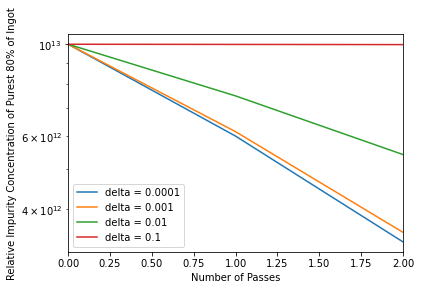

In [29]:
C0 = 1E+13
n = 2
k=0.2
Z = 0.1
vs = [0.0001*56,0.001*56,0.01*56,0.1*56]
p = 200
Vs = zrV(n,k,Z,vs,p)
plotPasses(C0,Vs,vs,n)

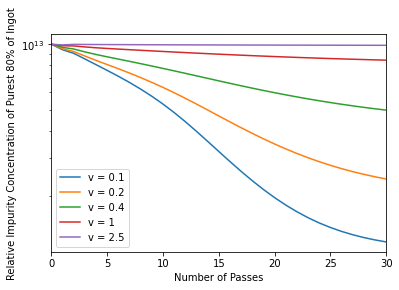

In [9]:
C0 = 1E+13
n = 30
k=1.8
Z = 0.1
vs = [0.1,0.2,0.4,1,2.5]
p = 200
Vs = zrV(n,k,Z,vs,p)
plotPasses(C0,Vs,vs,n)

In [25]:
0.58/58

0.009999999999999998